In [38]:
import pandas as pd #Para la lectura de datos
import numpy as np #Para colocar los datos en memoria y trabajarlos como matrices
import matplotlib.pyplot as plt #Para poder ejecutar graficas 

In [39]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD

In [40]:
datos = pd.read_csv('dataset.csv', sep=",", skiprows=32, usecols=[2,3]) #Leer los datos de un csv con pandas
print(datos)

    Age  Systolic blood pressure
0    39                      144
1    45                      138
2    47                      145
3    65                      162
4    46                      142
5    67                      170
6    42                      124
7    67                      158
8    56                      154
9    64                      162
10   56                      150
11   59                      140
12   34                      110
13   42                      128
14   48                      130
15   45                      135
16   17                      114
17   20                      116
18   19                      124
19   36                      136
20   50                      142
21   39                      120
22   21                      120
23   44                      160
24   53                      158
25   63                      144
26   29                      130
27   25                      125
28   69                      175


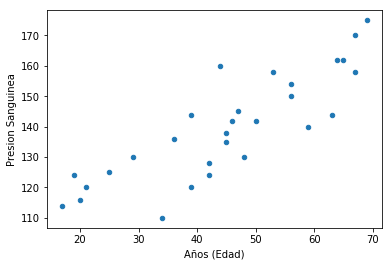

In [41]:
#Graficar los datos para que puedan existir una relacion lineal
datos.plot.scatter(x="Age", y="Systolic blood pressure")
plt.xlabel("Años (Edad)")
plt.ylabel("Presion Sanguinea")
plt.show()

In [42]:
#Otorgando los datos csv a variables para ser manipuladas
x = datos['Age'].values
y = datos['Systolic blood pressure'].values

In [43]:
#Construccion del modelo en keras
np.random.seed(2) #Para reproducibilidad del modelo

input_dim = 1
output_dim = 1
modelo = Sequential() #Es un contenedor que se añadiran elementos para poder realizar la regresion lineal o clasificacion de imagenes
modelo.add(Dense(output_dim, input_dim=input_dim, activation='linear')) #El modulo dense requiere de parametros como el dato de salida
# que dimension tiene en este caso uno solo porque solo se tiene una dimension de salida y se coloca el tipo de activacion que seria
#lineal
sgd = SGD(lr=0.0004) #El metodo es del descenso por gradiente que es un optimizador del error el cual como atributo se colocara
#un learning rate que es la taza de aprendizaje del modelo
modelo.compile(loss='mse', optimizer=sgd) #la funcion compile se define el optimizador a usar y tambien se define la funcion
#de costo, error o perdida (Error cuadratico medio)
modelo.summary() #Se imprime la informacion del modelo


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [44]:
#Proceso de entrenamiento 
num_epochs = 40000 #Se define el numero de iteraciones para actualizacion de parametros (epocas)
batch_size = x.shape[0] #En cada una de las iteraciones de los 29 datos, cuantos se usaran para calcular w y b
#como son pocos datos se pueden ofrecer a la iteracion desde memoria, aqui se coloca la cantidad de datos tendra 
#los datos de los ejemplos
history = modelo.fit(x, y, epochs=num_epochs, batch_size=batch_size, verbose=0)
#el verbose se imprime las iteraciones por pantalla

In [45]:
#Visualizar datos del modelo
#Impresion de los componente "w" y "b"
#Se extraen las capas del modelo
capas = modelo.layers[0]
w, b = capas.get_weights() #Se extraen los pesos 
print('Parametros: w= {:.1f}, b= {:.1f}'.format(w[0][0], b[0]))

Parametros: w= 1.0, b= 93.5


Text(0.5, 1.0, 'Datos con su regresion lineal')

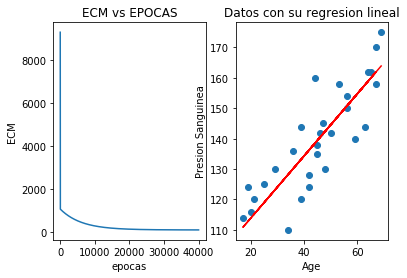

In [46]:
#Graficamiento de los resultados
plt.subplot(1,2,1)
plt.plot(history.history["loss"]) #Obtiene los resultado de la perdida 
plt.xlabel("epocas")
plt.ylabel("ECM")
plt.title("ECM vs EPOCAS")

y_regr = modelo.predict(x)
plt.subplot(1,2,2)
plt.scatter(x,y)
plt.plot(x, modelo.predict(x),'r')
plt.xlabel("Age")
plt.ylabel("Presion Sanguinea")
plt.title("Datos con su regresion lineal")